In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 18
plt.rcParams['text.usetex'] = True

# Numerov-Cooley method

We aim to use the Numerov-Cooley method to solve the 1D time independent Schrödinger equation. More information on the presentation.

In [175]:
def numerov(E, get_g=False):
    k = (dx**2)/12           # Numerov Parameter
    s = s_prime = 1e-6       # Free shooting parameters (inward and backward)
    
    psi = np.zeros(N)
    psi[0] = 0.0
    psi[1] = s
    psi[-1] = s_prime
    
    P = E-V
    
    # Forward integration to matching point m
    for i in range(1, N-1):
        psi[i+1] = (2*psi[i]*(1 - 5*k*P[i]) - psi[i-1]*(1 + k*P[i-1]))/(1 + k*P[i+1])
        if psi[i] < psi[i-1]:
            m = i+1
            psi_out_m = psi[m]
            break
    
    # Backward integration to matching point
    for i in range(N-2, m, -1):
        psi[i-1] = (2*psi[i]*(1 - 5*k*P[i]) - psi[i+1]*(1 + k*P[i+1]))/(1 + k*P[i-1])
        
    # Matching for continuity of psi
    psi[:m] = psi[:m]/psi_out_m
    psi[m:] = psi[m:]/psi[m]
    
    if get_g == False:
        return psi
    else:
        g = psi[m+1] + psi[m-1] -2*psi[m]
        return g

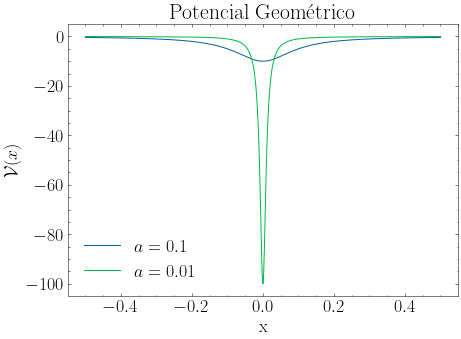

In [176]:
L = 1.0
dx = 0.001
x = np.arange(-L/2, L/2+dx, dx)
N = len(x)

def catenary_potential(x, a=1):
    return -a/(a**2 + x**2)

V1 = catenary_potential(x, a=0.1)
V2 = catenary_potential(x, a=0.01)

plt.plot(x, V1, label='$a = 0.1$')
plt.plot(x, V2, label='$a = 0.01$')
plt.xlabel('x')
plt.ylabel('$\\mathcal{V}(x)$')
plt.title('Potencial Geométrico')
plt.legend()
# plt.savefig('final_project_figs/vgeo.png', dpi=300)
plt.show()

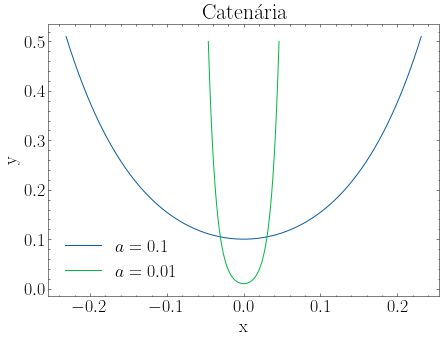

In [177]:
def catenary_curve(s, a):
    return np.array([a*np.arcsinh(s/a), np.sqrt(s**2 + a**2)])

plt.plot(catenary_curve(x, a=0.1)[0], catenary_curve(x, a=0.1)[1], label='$a = 0.1$')
plt.plot(catenary_curve(x, a=0.01)[0], catenary_curve(x, a=0.01)[1], label='$a = 0.01$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Catenária')
plt.legend()
# plt.savefig('final_project_figs/cat.png', dpi=300)
plt.show()

In [178]:
def numerov(E, V):
    k = (dx**2)/12           # Numerov Parameter
    s = s_prime = 1e-6       # Free shooting parameters (inward and backward)

    psi = np.zeros(N)
    psi[0] = 0.0
    psi[1] = s
    psi[-2] = s_prime

    for iteration in range(1000):
        P = E-V

        # Forward integration to matching point m
        for i in range(1, N-1):
            psi[i+1] = (2*psi[i]*(1 - 5*k*P[i]) - psi[i-1]*(1 + k*P[i-1]))/(1 + k*P[i+1])
            if psi[i] < psi[i-1]:
                m = i+1
                psi_out_m = psi[m]
                break

        # Backward integration to matching point
        for i in range(N-2, m, -1):
            psi[i-1] = (2*psi[i]*(1 - 5*k*P[i]) - psi[i+1]*(1 + k*P[i+1]))/(1 + k*P[i-1])

        # Matching for continuity of psi
        psi[:m] = psi[:m]/psi_out_m
        psi[m:] = psi[m:]/psi[m]

        # Cooley correction
        Y = (1+k*P)*psi
        dE = (psi[m].conj()/np.sum(np.abs(psi)**2))*(-0.5*(Y[m+1]-2*Y[m]+Y[m-1])/(dx**2)+(V[m]-E)*psi[m])
        E = E + dE

        if np.abs(dE) < 1e-6:
            print(f'Converged after {iteration+1} steps.')
            break
            
        # Normalization
        A = simps(psi**2, x)
        psi = psi/A
        
    return psi, E

In [179]:
psi11, E11 = numerov(10, V1)
psi12, E12 = numerov(20, V1)
psi13, E13 = numerov(60, V1)

psi21, E21 = numerov(10, V2)
psi22, E22 = numerov(20, V2)
psi23, E23 = numerov(60, V2)

Converged after 23 steps.
Converged after 28 steps.
Converged after 30 steps.
Converged after 24 steps.
Converged after 28 steps.
Converged after 30 steps.


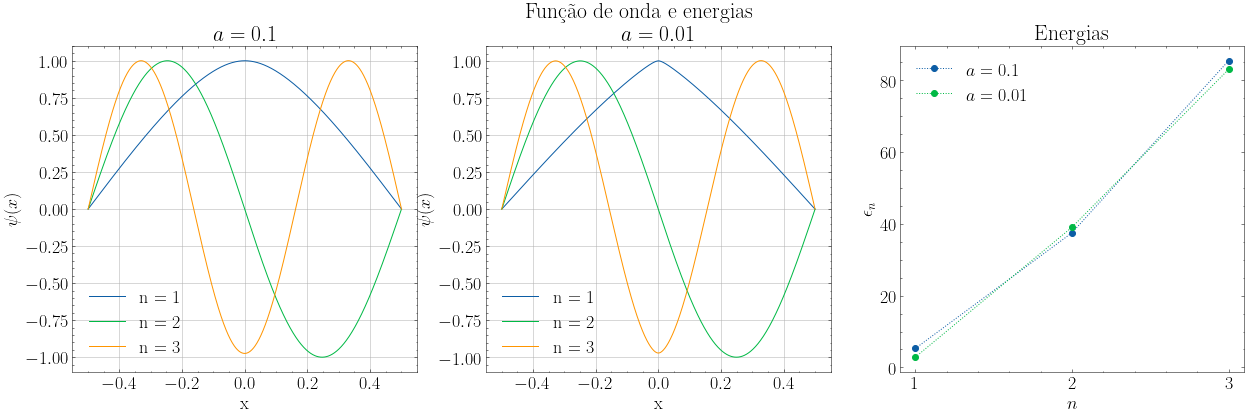

In [180]:
plt.figure(figsize=(21,6))
plt.suptitle('Função de onda e energias')
plt.subplot(1,3,1)
plt.plot(x, psi11, label='n = 1')
plt.plot(x, psi12, label='n = 2')
plt.plot(x, psi13, label='n = 3')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.title('$a = 0.1$')
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, psi21, label='n = 1')
plt.plot(x, psi22, label='n = 2')
plt.plot(x, psi23, label='n = 3')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.title('$a = 0.01$')
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.plot([1,2,3],[E11, E12, E13], marker='o', ls=':', label='$a = 0.1$')
plt.plot([1,2,3], [E21, E22, E23], marker='o', ls=':', label='$a = 0.01$')
plt.xticks([1,2,3])
plt.xlabel('$n$')
plt.ylabel('$\epsilon_n$')
plt.title('Energias')
plt.legend()
# plt.savefig('final_project_figs/onda.png', dpi=300)

plt.show()

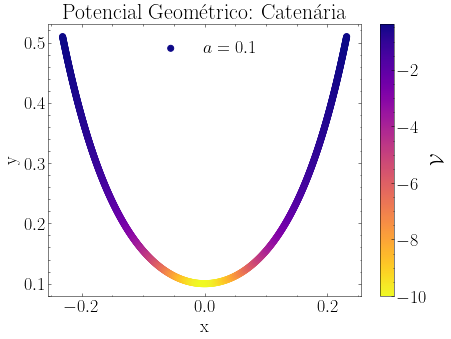

In [181]:
plt.scatter(catenary_curve(x, a=0.1)[0], catenary_curve(x, a=0.1)[1], label='$a = 0.1$', c=V1, cmap='plasma_r')
plt.colorbar(label='$\mathcal{V}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial Geométrico: Catenária')
plt.legend()
# plt.savefig('final_project_figs/curva_potencial.png', dpi=300)
plt.show()

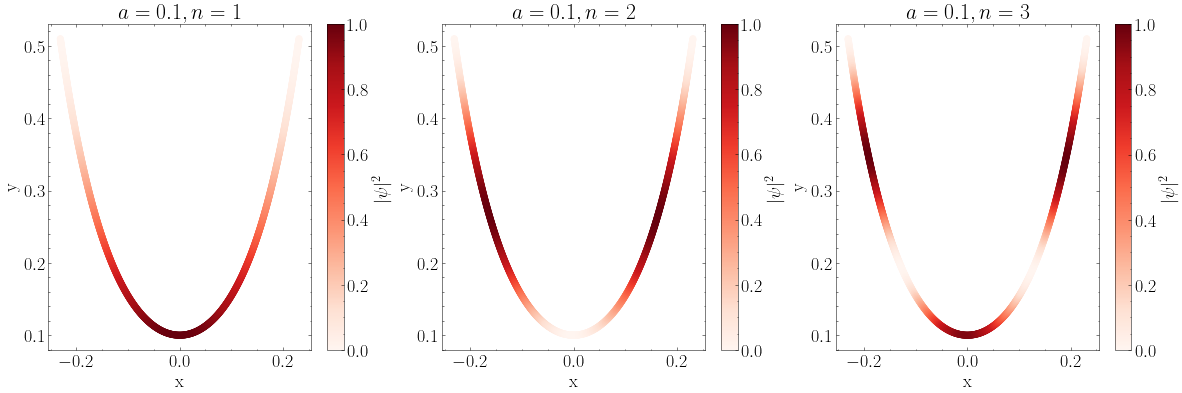

In [182]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plt.scatter(catenary_curve(x, a=0.1)[0], catenary_curve(x, a=0.1)[1], c=psi11**2, cmap='Reds')
plt.colorbar(label='$|\psi|^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$a = 0.1, n = 1$')


plt.subplot(1, 3, 2)
plt.scatter(catenary_curve(x, a=0.1)[0], catenary_curve(x, a=0.1)[1], c=psi12**2, cmap='Reds')
plt.colorbar(label='$|\psi|^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$a = 0.1, n = 2$')

plt.subplot(1, 3, 3)
plt.scatter(catenary_curve(x, a=0.1)[0], catenary_curve(x, a=0.1)[1], c=psi13**2, cmap='Reds')
plt.colorbar(label='$|\psi|^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$a = 0.1, n = 3$')
# plt.savefig('final_project_figs/curva_densidade.png', dpi=300)

plt.show()